In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\parkh\OneDrive\Desktop\HateSpeech\urdu_tweets_dataset.csv")

In [2]:
df = data.copy()

In [3]:
df.isnull().sum()

tweet    0
label    0
dtype: int64

In [4]:
df.head()

,tweet,label
0,kya mein bhooka hon? kutia ab tum ney ye pooch...,1
1,"khawateen ghaas ki tarah hain, inhen baqaidagi...",0
2,Afghani dehshat gard hotay hain,0
3,tamam sarkari hukkaam chor hain,1
4,yeh mohabbat nahi hai kutia,1


In [6]:
# extract the text and labels
X = list(data['tweet'])
y = list(data['label'])

In [8]:
unique_labels = df['label'].unique()
label_dict = {label: i for i, label in enumerate(unique_labels)}
num_labels = len(unique_labels)
print("Label mapping:", label_dict)


Label mapping: {1: 0, 0: 1}


In [10]:
import re
def clean_text(text):
    if pd.isnull(text):  # Check for NaN values
        return ''
    
    # Remove newlines
    text = re.sub(r'\n+', ' ', text)
    
    # Remove URLs (http, https, or www links)
    text = re.sub(r'http\S+|www\S+|t\.co\S+', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply the cleaning function to the 'cleaned_text' column
df['preprocessed_text'] = df['tweet'].apply(clean_text)

In [11]:
df['preprocessed_text']

0       kya mein bhooka hon? kutia ab tum ney ye pooch...
1       khawateen ghaas ki tarah hain, inhen baqaidagi...
2                         Afghani dehshat gard hotay hain
3                         tamam sarkari hukkaam chor hain
4                             yeh mohabbat nahi hai kutia
                              ...                        
3565    tera baap to tere maa ke yaar modi ko ghar bul...
3566              patwari hotay hi khinzeer ki olaad hain
3567    maa behen ke baare me abhi tk baat nhi ki, jab...
3568    agar ye kutia meri zindagi mein na aye hoti to...
3569    kab meray ghar aur zindagi se dafa ho rahi hai...
Name: preprocessed_text, Length: 3570, dtype: object

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
import warnings
from nltk.corpus import stopwords

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Binarizer


from collections import Counter
from os import listdir, makedirs
from os.path import isfile, join, splitext, split

In [14]:
from wordcloud import STOPWORDS, WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier 

warnings.filterwarnings('ignore')
np.random.seed(0)

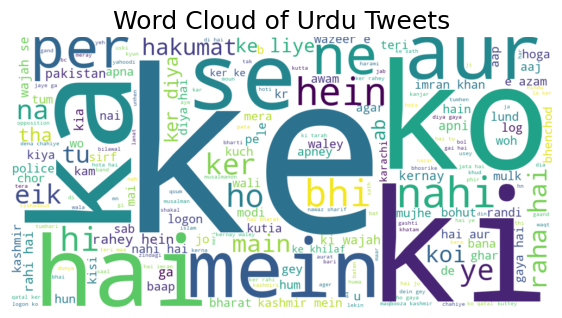

In [24]:
all_text = " ".join(df["tweet"].astype(str))

# If you have an Urdu-compatible font path, use it here. Otherwise, leave it None.
# Example: font_path = "NotoNastaliqUrdu-Regular.ttf"
font_path = None

# Generate the word cloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    font_path=font_path  # Add your Urdu-supporting font if available
).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(7,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Urdu Tweets", fontsize=18)
plt.show()

In [20]:
example=df['tweet'][333]
example

'khuda kary tu kuttey ki mout marey'

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 32)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from time import time
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB()
}

results = {}

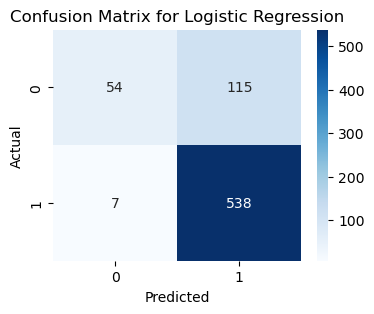

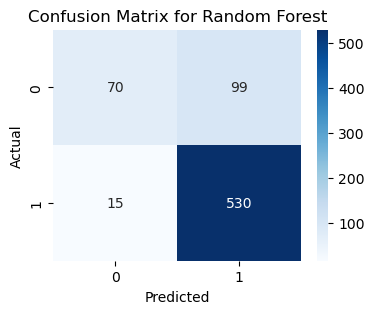

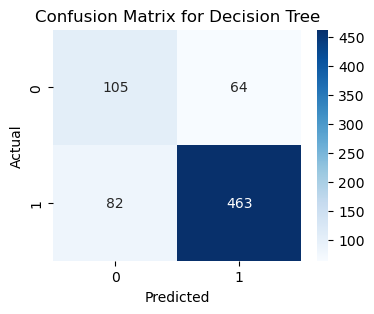

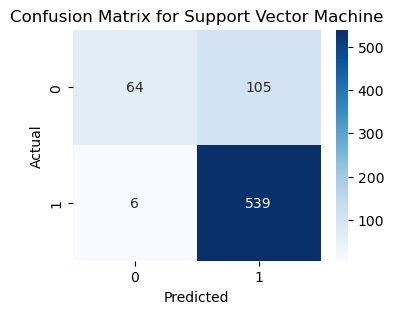

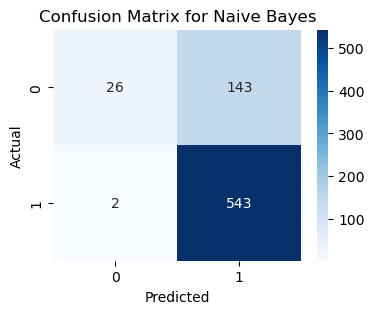

Results for Logistic Regression:
Accuracy: 0.8291316526610645
F1 Score: 0.7967166484798173
Precision: 0.838412416657472
Recall: 0.8291316526610645
Time Taken: 0.1511387825012207


Results for Random Forest:
Accuracy: 0.8403361344537815
F1 Score: 0.8196470180179276
Precision: 0.8380916754619175
Recall: 0.8403361344537815
Time Taken: 3.532238006591797


Results for Decision Tree:
Accuracy: 0.7955182072829131
F1 Score: 0.7989709593379529
Precision: 0.8035113303558443
Recall: 0.7955182072829131
Time Taken: 0.9883251190185547


Results for Support Vector Machine:
Accuracy: 0.8445378151260504
F1 Score: 0.8188117232880462
Precision: 0.8552599300589802
Recall: 0.8445378151260504
Time Taken: 0.9257538318634033


Results for Naive Bayes:
Accuracy: 0.7969187675070029
F1 Score: 0.7358730549913146
Precision: 0.823978571020245
Recall: 0.7969187675070029
Time Taken: 0.015019655227661133




In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from time import time

# Dictionary to store results
results = {}

# Iterate over each model
for model_name, model in models.items():
    start_time = time()
    
    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_tfidf)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    time_taken = time() - start_time
    
    # Save results
    results[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': conf_matrix,
        'Time Taken': time_taken
    }
    
    # Plot confusion matrix as heatmap
    plt.figure(figsize=(4,3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric_name, value in metrics.items():
        if metric_name != 'Confusion Matrix':
            print(f"{metric_name}: {value}")
    print("\n")


In [28]:
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Time Taken: {metrics['Time Taken']:.4f} seconds")



Model: Logistic Regression
Accuracy: 0.8291
F1 Score: 0.7967
Confusion Matrix:
[[ 54 115]
 [  7 538]]
Time Taken: 0.1511 seconds

Model: Random Forest
Accuracy: 0.8403
F1 Score: 0.8196
Confusion Matrix:
[[ 70  99]
 [ 15 530]]
Time Taken: 3.5322 seconds

Model: Decision Tree
Accuracy: 0.7955
F1 Score: 0.7990
Confusion Matrix:
[[105  64]
 [ 82 463]]
Time Taken: 0.9883 seconds

Model: Support Vector Machine
Accuracy: 0.8445
F1 Score: 0.8188
Confusion Matrix:
[[ 64 105]
 [  6 539]]
Time Taken: 0.9258 seconds

Model: Naive Bayes
Accuracy: 0.7969
F1 Score: 0.7359
Confusion Matrix:
[[ 26 143]
 [  2 543]]
Time Taken: 0.0150 seconds


In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


In [30]:
# Tokenization
max_words = 10000  # Maximum vocabulary size
max_len = 150      # Maximum sequence length

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')

# Fit the tokenizer on training text
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Ensure all data is in NumPy format
X_train_padded = np.array(X_train_padded)
X_test_padded = np.array(X_test_padded)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print the shapes for verification
print("X_train shape:", X_train_padded.shape)
print("X_test shape:", X_test_padded.shape)


X_train shape: (2856, 150)
X_test shape: (714, 150)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# CNN Model
cnn_model = Sequential()

# Embedding layer
cnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# CNN layers
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())

# Fully connected layers
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [32]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels to numeric values
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  # Use transform (not fit_transform) to keep consistency

# Convert to float32 (or int32) for model compatibility
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')


In [33]:
# Train the model using the padded sequences
cnn_history = cnn_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
90/90 [==============================] - 5s 45ms/step - loss: 0.5639 - accuracy: 0.7504 - val_loss: 0.5005 - val_accuracy: 0.7633
Epoch 2/10
90/90 [==============================] - 4s 50ms/step - loss: 0.3684 - accuracy: 0.8375 - val_loss: 0.3276 - val_accuracy: 0.8599
Epoch 3/10
90/90 [==============================] - 4s 41ms/step - loss: 0.1400 - accuracy: 0.9517 - val_loss: 0.3704 - val_accuracy: 0.8501
Epoch 4/10
90/90 [==============================] - 3s 39ms/step - loss: 0.0406 - accuracy: 0.9905 - val_loss: 0.4440 - val_accuracy: 0.8445
Epoch 5/10
90/90 [==============================] - 4s 42ms/step - loss: 0.0166 - accuracy: 0.9979 - val_loss: 0.5128 - val_accuracy: 0.8613
Epoch 6/10
90/90 [==============================] - 4s 41ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.5750 - val_accuracy: 0.8641
Epoch 7/10
90/90 [==============================] - 4s 40ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6006 - val_accuracy: 0.8571
Epoch 8/10
90

In [34]:
# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padded, y_test)
print(f"CNN Accuracy: {cnn_accuracy * 100:.2f}%")


23/23 [==============================] - 0s 7ms/step - loss: 0.6998 - accuracy: 0.8599
CNN Accuracy: 85.99%


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# LSTM Model
lstm_model = Sequential()

# Embedding layer
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# LSTM layer
lstm_model.add(LSTM(128, return_sequences=False))

# Fully connected layers
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
90/90 [==============================] - 14s 137ms/step - loss: 0.5831 - accuracy: 0.7447 - val_loss: 0.5647 - val_accuracy: 0.7633
Epoch 2/10
90/90 [==============================] - 11s 126ms/step - loss: 0.5715 - accuracy: 0.7511 - val_loss: 0.5483 - val_accuracy: 0.7633
Epoch 3/10
90/90 [==============================] - 9s 105ms/step - loss: 0.5703 - accuracy: 0.7511 - val_loss: 0.5477 - val_accuracy: 0.7633
Epoch 4/10
90/90 [==============================] - 9s 105ms/step - loss: 0.5684 - accuracy: 0.7511 - val_loss: 0.5478 - val_accuracy: 0.7633
Epoch 5/10
90/90 [==============================] - 10s 107ms/step - loss: 0.5682 - accuracy: 0.7511 - val_loss: 0.5473 - val_accuracy: 0.7633
Epoch 6/10
90/90 [==============================] - 9s 105ms/step - loss: 0.5656 - accuracy: 0.7511 - val_loss: 0.5486 - val_accuracy: 0.7633
Epoch 7/10
90/90 [==============================] - 10s 109ms/step - loss: 0.5672 - accuracy: 0.7511 - val_loss: 0.5501 - val_accuracy: 0.7633
Ep

In [36]:
# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test)
print(f"LSTM Accuracy: {lstm_accuracy * 100:.2f}%")


23/23 [==============================] - 1s 34ms/step - loss: 0.5480 - accuracy: 0.7633
LSTM Accuracy: 76.33%


In [37]:
from tensorflow.keras.layers import Bidirectional

# Bi-LSTM Model
bi_lstm_model = Sequential()

# Embedding layer
bi_lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# Bidirectional LSTM layer
bi_lstm_model.add(Bidirectional(LSTM(128, return_sequences=False)))

# Fully connected layers
bi_lstm_model.add(Dense(64, activation='relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Bi-LSTM model
bi_lstm_history = bi_lstm_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
90/90 [==============================] - 22s 208ms/step - loss: 0.5504 - accuracy: 0.7581 - val_loss: 0.4051 - val_accuracy: 0.8333
Epoch 2/10
90/90 [==============================] - 17s 189ms/step - loss: 0.2901 - accuracy: 0.8831 - val_loss: 0.3549 - val_accuracy: 0.8361
Epoch 3/10
90/90 [==============================] - 17s 188ms/step - loss: 0.1109 - accuracy: 0.9678 - val_loss: 0.4069 - val_accuracy: 0.8389
Epoch 4/10
90/90 [==============================] - 15s 171ms/step - loss: 0.0446 - accuracy: 0.9874 - val_loss: 0.5168 - val_accuracy: 0.8249
Epoch 5/10
90/90 [==============================] - 16s 173ms/step - loss: 0.0171 - accuracy: 0.9951 - val_loss: 0.6487 - val_accuracy: 0.8445
Epoch 6/10
90/90 [==============================] - 16s 175ms/step - loss: 0.0203 - accuracy: 0.9940 - val_loss: 0.6999 - val_accuracy: 0.8403
Epoch 7/10
90/90 [==============================] - 16s 175ms/step - loss: 0.0040 - accuracy: 0.9996 - val_loss: 0.8487 - val_accuracy: 0.8459

In [38]:
# Evaluate the Bi-LSTM model
bi_lstm_loss, bi_lstm_accuracy = bi_lstm_model.evaluate(X_test_padded, y_test)
print(f"Bi-LSTM Accuracy: {bi_lstm_accuracy * 100:.2f}%")


23/23 [==============================] - 2s 73ms/step - loss: 0.9384 - accuracy: 0.8417
Bi-LSTM Accuracy: 84.17%


In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Concatenate, Dense, Dropout

# Input
input_layer = Input(shape=(max_len,))

# Shared Embedding layer
embedding = Embedding(input_dim=max_words, output_dim=128, input_length=max_len)(input_layer)

# LSTM Branch
lstm = LSTM(64, return_sequences=True)(embedding)
lstm_pool = GlobalMaxPooling1D()(lstm)

# CNN Branch
conv = Conv1D(64, kernel_size=3, activation='relu')(embedding)
conv_pool = GlobalMaxPooling1D()(conv)

# Merge both
merged = Concatenate()([lstm_pool, conv_pool])
merged = Dropout(0.5)(merged)
output = Dense(1, activation='sigmoid')(merged)

# Final model
model = Model(inputs=input_layer, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150)]                0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 150, 128)             1280000   ['input_1[0][0]']             
                                                                                                  
 lstm_2 (LSTM)               (None, 150, 64)              49408     ['embedding_3[0][0]']         
                                                                                                  
 conv1d_1 (Conv1D)           (None, 148, 64)              24640     ['embedding_3[0][0]']         
                                                                                              

In [41]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# 4. Pad sequences
maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')

In [45]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, concatenate, Dense, Dropout
from tensorflow.keras.utils import to_categorical

num_classes = len(df['label'].unique())
texts = df['tweet'].astype(str).values
labels = to_categorical(df['label'].astype(int).values, num_classes=num_classes)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# 3. Tokenization & Padding
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# 4. Build Hybrid Model: CNN + LSTM
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=max_words, output_dim=128, input_length=max_len)(input_layer)

# CNN branch
cnn_layer = Conv1D(64, 5, activation='relu')(embedding_layer)
cnn_layer = GlobalMaxPooling1D()(cnn_layer)

# LSTM branch
lstm_layer = LSTM(64)(embedding_layer)

# Merge both branches
merged = concatenate([cnn_layer, lstm_layer])
dense = Dense(64, activation='relu')(merged)
dropout = Dropout(0.5)(dense)
output = Dense(num_classes, activation='softmax')(dropout)

# Compile model
model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Train model
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)

Epoch 1/10
90/90 [==============================] - 9s 71ms/step - loss: 0.5645 - accuracy: 0.7514 - val_loss: 0.5323 - val_accuracy: 0.7493
Epoch 2/10
90/90 [==============================] - 6s 62ms/step - loss: 0.3845 - accuracy: 0.8200 - val_loss: 0.3749 - val_accuracy: 0.8459
Epoch 3/10
90/90 [==============================] - 5s 57ms/step - loss: 0.1222 - accuracy: 0.9618 - val_loss: 0.4288 - val_accuracy: 0.8403
Epoch 4/10
90/90 [==============================] - 6s 67ms/step - loss: 0.0342 - accuracy: 0.9912 - val_loss: 0.5039 - val_accuracy: 0.8333
Epoch 5/10
90/90 [==============================] - 7s 77ms/step - loss: 0.0127 - accuracy: 0.9986 - val_loss: 0.6021 - val_accuracy: 0.8403
Epoch 6/10
90/90 [==============================] - 5s 60ms/step - loss: 0.0056 - accuracy: 0.9996 - val_loss: 0.6491 - val_accuracy: 0.8319
Epoch 7/10
90/90 [==============================] - 5s 57ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.7042 - val_accuracy: 0.8361
Epoch 8/10
90

In [46]:
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


23/23 [==============================] - 0s 15ms/step - loss: 0.8484 - accuracy: 0.8333
Test Accuracy: 83.33%


In [48]:
from sklearn.metrics import accuracy_score
import numpy as np

# Predict probabilities
y_pred_probs = model.predict(X_test_pad)

# Convert one-hot predictions and labels back to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Test Accuracy:", acc)


23/23 [==============================] - 0s 18ms/step
Test Accuracy: 0.8333333333333334
